In [1]:
#Audio Classification using Machine Learning technique
#Here we are using animal sound dataset
#Main motto of this module is to explore librosa and also learn how to classify the objects based on sounds
#Data set reference is taken from Kaggle
#As per the resources and understanding this dataset analysis and classification is done 4 parts

#1.Part 1: Simple EDA on the dataset
#2.Part 2: Data Preprecessing
#3.Part 3:Data Modelling using CNN
#4.Part 4:Pediction of data

In [ ]:
#This model is based on understanding the librosa model in detail as well how to classify the sound signals using 
#CNN classification.

#Every step that I have undererstood from this classifcation and what are some of the changes that I have made with respect to
#Mr Kirsh Naiks Model


In [2]:
#Here the first step is to install the librosa library using given code 


!pip install librosa

  Using cached librosa-0.8.1-py3-none-any.whl (203 kB)
  Using cached SoundFile-0.10.3.post1-py2.py3.cp26.cp27.cp32.cp33.cp34.cp35.cp36.pp27.pp32.pp33-none-win_amd64.whl (689 kB)
  Using cached pooch-1.5.1-py3-none-any.whl (57 kB)
  Using cached audioread-2.1.9.tar.gz (377 kB)
  Using cached resampy-0.2.2.tar.gz (323 kB)
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23143 sha256=22b84b5e653ed9e993d2a5c683c6d2003415eb165e8dbccdf14903f9ac46b6ba
  Stored in directory: c:\users\malla\appdata\local\pip\cache\wheels\a2\a3\bd\ec1568ce7515115a11ab686d509ad302124c782af065de47ee
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320719 sha256=6aa2cc5a9fcf57cf9aa6d15b66c3d027b6b5cb4270fb9dff4b30d7a6a7ee5d02
  Stored in directory: c:\users\malla\appdata\local\pip\cache\wheels\86\2c\7d\46a32a246b0e5939cea2c5ec1492164073e0c5d16d666ae2cd
Successfully built audioread resampy


In [77]:
# Here we are importing thr required libraries

# 1. Matplot:This library is needed to plot the sound wave which is in the array form
# 2. So what difference I have found in this dataset is librosa library is installed but librosa_display is not present in 
# librosa library so I had to install librosa.display 
#3. We need to install IPython library to play the audio which I installed previously in Command prompt

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import librosa.display
import IPython.display as ipd

In [80]:
#Before going into classification I had to understand the library
#For this pupose I had copy paste one of the audio from animal classification dataset
#Let me make it simple what I have understood from this and what code I have used
#will mention error that I have encountered too 

 #1.  I loaded the sound file into filename with full path
    
 #    ERROR: I have just copy pasted the link without telling the complier to open the sound file read or write mode
        
 #             'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape
 #                              Resoved By giving r means reading mode

    
 #2. Loaded the sample of sound using librosa dividing them too np.array and  Displayed the audio file using Ipython to listen 


In [79]:
filename=r'C:\Users\malla\OneDrive\Desktop\Internship\Animal Sound Dataset\Urban\Dog.wav'

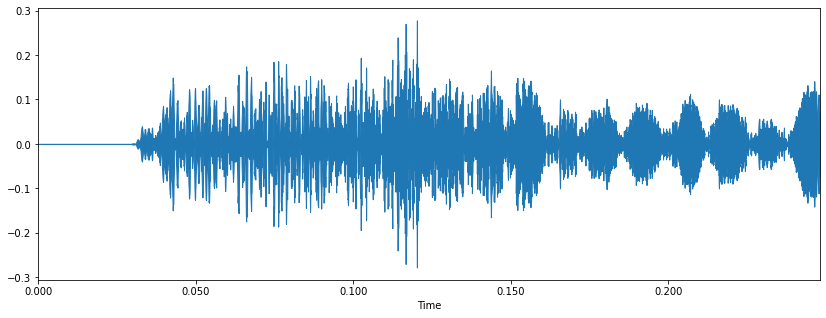

In [6]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

#librosa here give data and sample rate 
#Here wave plot takes two parameters one is data snd one is sample
#Here I got an error that it should be in form of numpy array for this reason we use librosa
#Here this just an information about single data from the dataset#

In [7]:
#Sample Rate

#Sample rate is basically how many time a signal is sampled or points are taken at random.Through librosa we read the audio with 22050 
#This can be analyzed below we can see it 

sample_rate

#In an audio they may be different different samplele.Basically in audio they are two channel stereo and ,ono.
#In mono we get samples at same time but in streo we can adjust the sample rate.
#Exmaple can be obseved in headphone 
#In librosa normalization is done on the sample and give same samples for second

22050

In [8]:
from scipy.io import wavfile as wav


In [9]:
wave_sample_rate,wave_audio=wav.read(filename)

In [10]:
wave_sample_rate

#This is the sample rate after normalization from this we can know that diifferent files have different sample rate

44100

In [11]:
wave_audio

#Lets take a sound wave .In sound wave each and every point is  is represented buy integer or float point when combined it 
#creates a graph.

#When we use scipy we cant normalize the signal

#Advantages of Librosa over scipy

#1 Valuers are normalized between -1 to 1 or specified limit
#2 It basically turns the signal to mono
#3 It automatically converts any signal to 22KHz

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [-2357, -2032],
       [-2327, -2161],
       [-2596, -2295]], dtype=int16)

In [81]:
# In below step we have already a csv file with path divided we have to combine the path in later staged to load the data.
# We used pandas to load the dataset

# Now we check for NUll values and there is no need for us to check for outliers because it is classification algorithm based on
# categorical data

# We also need to knoe the categorical class didtincet values and there counts for that we have used value_counts()

In [12]:
import pandas as pd
metadata=pd.read_csv(r'C:\Users\malla\OneDrive\Desktop\Internship\Animal Sound Dataset\Urban\UrbanSound8K\metadata\UrbanSound8k.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [13]:
metadata["class"].value_counts()

drilling            1000
dog_bark            1000
children_playing    1000
engine_idling       1000
street_music        1000
air_conditioner     1000
jackhammer          1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [14]:
#Checking the null values

metadata.isnull().sum()

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

In [82]:
# Part 2:Data Preprocessing

#Here I have understood the theorotical concepts of  types of waves a sound wave can be categorized

# i. Mono wave    

# ii. Stero Wave

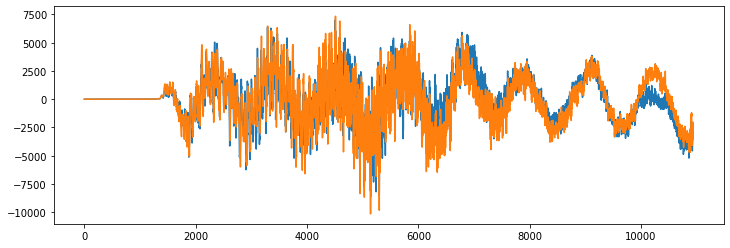

In [15]:

#Original audio with 2 channels with streo as well as mono
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

#Here orange and blue are two types of signals


In [16]:
#Here I want to understand feature engineering before I go for classification so I had selected random sinnal renamed sa lib

#Same as first and second wave I had read the image into variable and loaded the image using librosa changed the file into 
#into array and samples

#Now lets analyze with different signals

filename1=r'C:\Users\malla\OneDrive\Desktop\Internship\Animal Sound Dataset\Urban\lib.wav'
plt.figure(figsize=(14,5))
librosa_audio_data,librosa_sample_data=librosa.load(filename1)

<Figure size 1008x360 with 0 Axes>

In [17]:
#Lets plot the librosa and audio

print(librosa_audio_data)

[ 0.00330576  0.00468387  0.00360455 ... -0.0037562  -0.00348641
 -0.00356705]


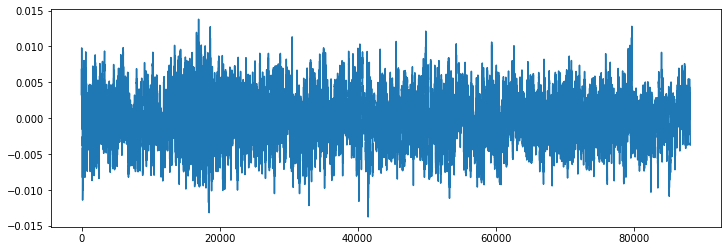

In [18]:
#Lets plot the librosa audio data
import matplotlib.pyplot as plt

#Original audio with 1 channel

plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

In [ ]:
#Here when I was going through some of the artices I have understood we can chagnge the sound with scipy also but it has its own
#disadvantages

# Here audio signal is not flattened but in librosa ,signal is automatically flattned.

In [19]:
#Lets use scipy for same filename2 signal

from scipy.io import wavfile as wav
wave_sample1_rate,wave_audio1=wav.read(filename1)

In [20]:
wave_audio1

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

In [21]:
wave_sample1_rate

44100

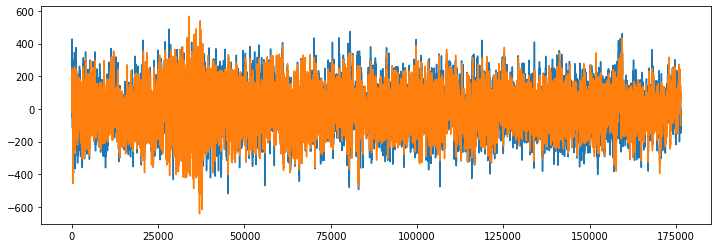

In [22]:
#Original audio with 2 channels with streo as well as mono
plt.figure(figsize=(12,4))
plt.plot(wave_audio1)

In [23]:
#Extracting the features

mffcs=librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_data,n_mfcc=40)
print(mffcs.shape)

(40, 173)


In [24]:
mffcs

array([[-4.45197296e+02, -4.47219299e+02, -4.49755127e+02, ...,
        -4.77412781e+02, -4.74241730e+02, -4.82704987e+02],
       [ 1.12513969e+02,  1.11970383e+02,  1.12244164e+02, ...,
         1.12045395e+02,  1.12248581e+02,  1.05560913e+02],
       [-1.58260956e+01, -2.30021858e+01, -3.12500191e+01, ...,
        -9.15441895e+00, -1.03232269e+01, -7.39410734e+00],
       ...,
       [-7.82766485e+00, -5.03880405e+00, -4.48165369e+00, ...,
        -1.90692782e-01,  4.34143972e+00,  1.00339069e+01],
       [-1.91763496e+00, -8.02737713e-01, -1.20930457e+00, ...,
        -1.23640239e-01,  2.90504694e-02,  9.22017097e-01],
       [-3.88130605e-01,  3.09317827e-01,  6.72155714e+00, ...,
        -2.33736587e+00, -4.25179911e+00, -2.31322765e+00]], dtype=float32)

In [83]:
#Part 3: Building a Classification Models

#STEP1 : We load the paths first we load the audio path and we load the csv file too
#STEP2 :Audio path is for later uses to download the data

In [25]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa
audio_dataset_path=r'C:\Users\malla\OneDrive\Desktop\Internship\Animal Sound Dataset\Urban\UrbanSound8K\audio'
metadata=pd.read_csv(r'C:\Users\malla\OneDrive\Desktop\Internship\Animal Sound Dataset\Urban\UrbanSound8K\metadata\UrbanSound8k.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [34]:
#Here we write the defination of loading the image using dataset 
#Here we use librosa to load the image into numpy and as well as samples
#We also caluculate mfcc coeficient also
#We take mean of this coefficient



def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [29]:
#Here to know how many images are dowloaded or thow much of task is complted we use tqdm
#Here I had installed by using pip command


!pip install tqdm

  Using cached tqdm-4.62.3-py2.py3-none-any.whl (76 kB)


In [84]:
#Here we use extracted_feature as the list to strore all the sound waves

#We take index_num and row as features in metadata using iterowss we can gp towards the list for reading th path that we have 
#specified usinh os.path.join.This path I have understood by looking into the path of sounds and 

#Here we use the previous feature extrator defination to extract every image and store it to list as feature and class.
#Here feature contains the numpy_array of the sound wave as specified in defination of feature extractor

In [30]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [03:05, 19.33it/s]c:\users\malla\appdata\local\programs\python\python39\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8323it [08:57, 19.96it/s]c:\users\malla\appdata\local\programs\python\python39\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
8327it [08:57, 24.10it/s]c:\users\malla\appdata\local\programs\python\python39\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [09:30, 15.30it/s]


In [36]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [37]:
a=row["fold"]
b=row["slice_file_name"]
print(a)
print(b)

7
99812-1-6-0.wav


In [38]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [39]:
X.shape

(8732, 40)

In [40]:
y.shape

(8732,)

In [41]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [43]:
!pip install tensorflow

In [44]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
import tensorflow
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [45]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [46]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [47]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786109e+00,  2.8736601e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787214e+00, ...,
        -3.3844023e+00, -5.2119045e+00, -1.5936136e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537492e-01,  2.7793026e+00],
       ...,
       [-4.2699332e+02,  9.2890656e+01,  3.0233388e+00, ...,
         8.6335993e-01,  6.4766800e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777871e+00, -1.9530845e+00, -8.9652127e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
        -5.1484952e+00, -3.6400862e+00, -1.3321608e+00]], dtype=float32)

In [48]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [49]:
X_test

array([[-2.6843979e+02,  1.0518529e+02,  1.6390162e+01, ...,
        -1.5581977e+00, -5.8735836e-01, -3.0098107e+00],
       [-4.6618430e+02,  1.5388278e+00, -3.4397358e+01, ...,
         1.7722294e+01,  1.3837573e+01, -5.1643491e+00],
       [-9.3993507e+01,  4.5099487e+01, -4.3546913e+01, ...,
         4.3592482e+00, -7.6900458e-01, -1.7438126e+00],
       ...,
       [-1.2512508e+02,  1.3853845e+02, -3.3203197e+01, ...,
        -8.9061222e+00,  4.7530365e+00,  1.1859551e+01],
       [-2.0623969e+02,  9.9557693e+01, -3.1034044e+01, ...,
        -2.0642972e-01,  9.3187761e-01,  7.1373761e-01],
       [-2.8746240e+02,  1.5100063e+02,  6.1528478e+00, ...,
        -2.0971873e-01, -2.1105676e+00, -1.5800692e+00]], dtype=float32)

In [50]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#In model selection we have read the required libraries for CNN.Here we used tensorflow,Sequential,and for modelling CNN 
#we import dense dropout activation function and also fkatten to flatten the numppy array.

#To reduce the loss function here we are using Adam Optimizer as it is mostly used optimizer as it reduces the loss gradually.

In [51]:
#Part 3: Model Selection


import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics


2.6.0


In [52]:
num_labels=y.shape[1]

In [ ]:
#A model is built which is sequential with one input,two dense and one output layer

#Here we may not understand why I have taken 40 in input.Reason is when we sheck the shape of X_train shape here we have 40 
#in the dimension.

#Here we use refu activation function

In [53]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [54]:
#Here we get clear understanding of sequential neural network basically here internal mechanism we use is
#boosting through weights


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [ ]:
#For complinling the model here we use loss,metrics and optimizer

#Here we used categorical_crossentrop because in our class they are more than 2 variables

#Here we train the model by giving epochos as 250
             # I have also tried with 100 and 200 got 70 and 75 percent accuracies so I decided to increase the  epochos
    
#To knoe the complilation time we have also imported datetime library

#Here to know the clear working and step by step processes we have checkpointer and I stores in path in my computer to refer 
#in case of any interuuption or in any bewildered state.

#Here we use batch size 32 

In [55]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [62]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 250
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=r'C:\Users\malla\OneDrive\Desktop\Internship\Animal Sound Dataset\audio_classification.hdf5', verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/250
219/219 [==============================] - 0s 1ms/step - loss: 0.7692 - accuracy: 0.7413 - val_loss: 0.6219 - val_accuracy: 0.8002

Epoch 00001: val_loss improved from inf to 0.62188, saving model to C:\Users\malla\OneDrive\Desktop\Internship\Animal Sound Dataset\audio_classification.hdf5
Epoch 2/250
219/219 [==============================] - 0s 1ms/step - loss: 0.7925 - accuracy: 0.7417 - val_loss: 0.6184 - val_accuracy: 0.8054

Epoch 00002: val_loss improved from 0.62188 to 0.61845, saving model to C:\Users\malla\OneDrive\Desktop\Internship\Animal Sound Dataset\audio_classification.hdf5
Epoch 3/250
219/219 [==============================] - 0s 1ms/step - loss: 0.8015 - accuracy: 0.7350 - val_loss: 0.6506 - val_accuracy: 0.7939

Epoch 00003: val_loss did not improve from 0.61845
Epoch 4/250
219/219 [==============================] - 0s 1ms/step - loss: 0.7961 - accuracy: 0.7357 - val_loss: 0.6207 - val_accuracy: 0.8088

Epoch 00004: val_loss did not improve from 0.61845
Ep

In [86]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8088151216506958


In [65]:
X_test[1]

array([-466.1843    ,    1.5388278 ,  -34.397358  ,   35.715332  ,
        -15.166929  ,  -18.850813  ,   -0.7415805 ,  -15.99989   ,
        -21.354332  ,    7.650684  ,  -29.031452  ,  -19.142824  ,
         -2.6798913 ,   -8.466883  ,  -14.7660475 ,   -7.004778  ,
         -7.103754  ,    8.887754  ,   14.911873  ,   21.47102   ,
         21.336624  ,    0.91695195,  -18.795404  ,   -5.0017214 ,
         -0.70152664,    2.91399   ,   -6.710599  ,  -16.638536  ,
         -9.821647  ,   12.8619585 ,    0.65529794,  -23.953394  ,
        -15.200551  ,    9.210791  ,   10.4198    ,   -0.5791612 ,
         -1.2440346 ,   17.722294  ,   13.837573  ,   -5.164349  ],
      dtype=float32)

In [68]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

In [69]:
#Here we prict the models we use aboove predict and argmax functions for the prediction. What I analyzed is in present tensorflow these 
#command are different


print(predict_x)

[[8.37963698e-10 3.93186474e-06 2.60643606e-06 ... 5.04332904e-14
  1.34252559e-06 6.99092489e-05]
 [3.94961219e-08 1.34949654e-03 1.05701955e-02 ... 1.01205366e-09
  4.23857849e-03 4.72616591e-03]
 [2.34234463e-07 4.83035692e-04 2.38800276e-04 ... 3.08123243e-04
  3.21375235e-04 1.02143653e-03]
 ...
 [3.41334448e-12 9.99900222e-01 3.63317449e-12 ... 6.97584942e-16
  6.78671832e-12 9.81906851e-05]
 [8.49940106e-02 6.77137962e-03 4.01247203e-01 ... 1.50007708e-02
  1.46948276e-02 3.25233191e-01]
 [6.36240467e-02 2.59704478e-02 3.04048419e-01 ... 3.93504836e-03
  5.94715178e-02 3.69317055e-01]]


In [70]:
print(classes_x)

[5 3 4 ... 1 2 9]


In [75]:
#Testing Some audio

#For testing we follow the same procedure read a randoem sound file and load it using librosa
#Use mfccs to fine the coeficient and find the mean to get right coefficient
#Then we have to flatten using reshape or we can use flatten function to convert mffs coefficients to ID array
#Fing the shape of mfcc coeffiecients
#Now use pridict on mfcc and then argmax using numpy array.
#Now find the inverse fourier transform.Tis is basically to know the frequency of the sounf wave and preidic the model


filename5=r'C:\Users\malla\OneDrive\Desktop\Internship\Animal Sound Dataset\Urban\UrbanSound8K\audio\fold6\4912-3-3-0.wav'
audio3, sample_rate3 = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio3, sr=sample_rate3, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
classes_x1=np.argmax(predicted_label,axis=1)
print(classes_x1)


#This is to converting the coeficients to words back again
prediction_class = labelencoder.inverse_transform(classes_x1) 
prediction_class

[-2.3124544e+02  1.6848421e+02 -2.1626402e+01 -1.4239217e+01
 -1.9327440e+01  9.8452940e+00 -4.4468188e+00  6.5970826e+00
 -1.9078714e+01  7.3205681e+00 -2.1091449e+00  2.0327337e+01
 -3.8006809e+00  1.4745646e+01  1.4600289e+01  8.2294760e+00
 -3.7431996e+00  1.1279180e+01 -3.8088071e+00  1.5195040e+00
 -1.1525289e+00 -3.7742274e+00 -4.2864776e+00  6.1019020e+00
  1.4462957e+00 -3.8629133e-02  5.8810663e-01 -4.7659917e+00
 -4.2039803e-01 -5.3615189e+00 -3.5628576e+00 -3.4261971e+00
 -4.0014076e-01  4.3577466e+00  5.7690845e+00  3.6733380e-01
  2.6575837e+00 -3.8266640e+00 -5.8193612e+00 -4.6543241e+00]
[[-2.3124544e+02  1.6848421e+02 -2.1626402e+01 -1.4239217e+01
  -1.9327440e+01  9.8452940e+00 -4.4468188e+00  6.5970826e+00
  -1.9078714e+01  7.3205681e+00 -2.1091449e+00  2.0327337e+01
  -3.8006809e+00  1.4745646e+01  1.4600289e+01  8.2294760e+00
  -3.7431996e+00  1.1279180e+01 -3.8088071e+00  1.5195040e+00
  -1.1525289e+00 -3.7742274e+00 -4.2864776e+00  6.1019020e+00
   1.4462957e+00 

array(['dog_bark'], dtype='<U16')

In [76]:
ipd.Audio(filename5)

In [ ]:
#From this Classification I have known following points


# 1.  Difference between librosa and scipy
# 2.  Understood why we use fourier transform
# 3.  Verbose:expressing in more than one meaning
# 4.  Checkpointer:We can model in somecases so to retrive and know the accuracy of that model we can refer to this checkpointer.
# 5. to_categorical:This converts the str into binary format
